In [1]:
# Load all neccessary packages 
import pandas as pd
import warnings
import numpy as np
import sys
warnings.filterwarnings("ignore")
from noise_helpers.indicators import *
from noise_helpers.labels import *
from noise_helpers.is_class import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as tk
from matplotlib.ticker import PercentFormatter , NullFormatter
from collections import defaultdict
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker

## Regression 

In [2]:
data = pd.read_csv("./Data/data.csv")
data = data.fillna(0)
data = data[(data["Leq"] != 0)] #Remove invalid data samples 

columns = [ "weekday", "hour", "minute" , "is_holiday", "is_class"]
col_y = [ "NPL" ,   "Leq"  ,   "L10" ,   "L90" ,   "L50" ,  "NPL_4" ,   "Leq_4"  ,   "L10_4" ,   "L90_4" ,   "L50_4" , "NPL_10" ,   "Leq_10"  ,   "L10_10" ,   "L90_10" ,   "L50_10" ,"NPL_20" ,   "Leq_20"  ,   "L10_20" ,   "L90_20" ,   "L50_20" ,
          "NPL_30" ,   "Leq_30"  ,   "L10_30" ,   "L90_30" ,   "L50_30" , "NPL_60" ,   "Leq_60"  ,   "L10_60" ,   "L90_60" ,   "L50_60" , "NPL_120" ,   "Leq_120"  ,   "L10_120" ,   "L90_120" ,   "L50_120" , "NPL_180" ,   "Leq_180"  ,   "L10_180" ,   "L90_180" ,   "L50_180" ,
          "NPL_300" ,   "Leq_300"  ,   "L10_300" ,   "L90_300" ,   "L50_300" , "NPL_450" ,   "Leq_450"  ,   "L10_450" ,   "L90_450" ,   "L50_450" , "NPL_900" ,   "Leq_900"  ,   "L10_900" ,   "L90_900" ,   "L50_900"  ]


In [3]:
def q_map(d):
    if d == 15:
        return 1
    elif d == 30:
        return 2
    elif d == 45:
        return 3
    else:
        return 0
data["q_map"] = data["minute"].apply(q_map)

In [4]:
data.loc[data["week"] == 8].reset_index()["Leq"];


In [5]:
R2_pred = []
RMSE_pred = []
RMSE_pred450 = []
pr_importance = []
errors = []
errors_r = []

train = data.loc[data["week"] != 8].reset_index()
test = data.loc[data["week"] == 8].reset_index()

train_X = pd.DataFrame(train, columns=columns)
test_X = pd.DataFrame(test, columns=columns)
 
# for graph purpose 
test_g = test[test.dayofyear == 51]
test_g_x = pd.DataFrame(test_g, columns=columns)

for col in col_y:
    train_y = train[col]
    test_y = test[col]
    print ("Predictor"  , col)        
    rf = RandomForestRegressor(n_estimators=100, max_features = 5, min_samples_leaf= 1, n_jobs=8)
    rf.fit(train_X, train_y)
    pr_imp = rf.feature_importances_
    y_pred_reg = rf.predict(test_X)
    
    r2 = r2_score(test_y , y_pred_reg)
    rmse = np.sqrt (mean_squared_error(test_y, y_pred_reg))
    
    if len(col.split('_')) == 1:
        f = 2
    else:
        f = col.split('_')[1]
    
    ind = col.split('_')[0]
    
    n = 900/ int(f)
    
    rmse450 = np.sqrt (mean_squared_error(test[ind], y_pred_reg))


    for i in range(len(test_y)):
        E = test_y [i] - y_pred_reg[i]
        Er = test[ind][i] - y_pred_reg[i]
        
        errors.append([ind, E , n])
        errors_r.append([ind, Er , n])      

        print("R2 = ", r2)
        print ("RMSE = " , rmse)
        R2_pred.append([ind ,  r2, n])
        RMSE_pred.append([ind ,rmse, n])
        RMSE_pred450.append([ind ,rmse450, n])
        pr_importance.append(pr_imp)
        
    # for the graph     
    if ind =="Leq":
        if n == 450:
            y_pred_450 = rf.predict(test_g_x)
        elif n == 450:
            y_pred_30 = rf.predict(test_g_x)
        elif n == 225:
            y_pre_225 = rf.predict(test_g_x)
        elif n == 90:
            y_pred_90 = rf.predict(test_g_x)
        elif n ==45:
            y_pred_45 = rf.predict(test_g_x)
        elif n == 30:
            y_pred_30 = rf.predict(test_g_x)
        elif n == 15:
            y_pred_15 = rf.predict(test_g_x)
        elif n == 7.5:
            y_pred_7 = rf.predict(test_g_x)
        elif n == 5:
            y_pred_5 = rf.predict(test_g_x)

Predictor NPL
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.2601034156113355
R2 =  0.8153252051796587
RMSE =  3.260103415611335

R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232700803255492
RMSE =  2.1091087930280428
R2 =  0.8232

Predictor L10
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.307252604141557

RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
R2 =  0.8428688854318985
RMSE =  2.3072526041415573
Predictor L90
R2 =  0.8029343298394828
RMSE =  1.4172449702262169
R2 =  0.802934329839482

R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453008003342547
RMSE =  1.7185219303389716
R2 =  0.8453

R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102733121966158
RMSE =  3.3070015352079434
R2 =  0.8102

R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354127101739972
RMSE =  2.0206525359989267
R2 =  0.8354

Predictor L10_4
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.842973225876564
RMSE =  2.3077487256036426
R2 =  0.8429732

R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015

R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
R2 =  0.8015261197433572
RMSE =  1.4224091579561813
Predictor L50_4
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469258
R2 =  0.8478106759650417
RMSE =  1.7056525244469

R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976331676509367
RMSE =  3.3761640188575606
R2 =  0.7976

Predictor Leq_10
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.823515

R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =  2.098126708686649
R2 =  0.8235151681001333
RMSE =

R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031

R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
R2 =  0.8031569836708069
RMSE =  1.4263804313859099
Predictor L50_10
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.7250792302793307
R2 =  0.8447828889712874
RMSE =  1.725079230279

R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975855250638695
RMSE =  3.3544625262579273
R2 =  0.7975

R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =  2.054034446126913
R2 =  0.8270740791868031
RMSE =

Predictor L10_20
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 =  0.82955186466797
RMSE =  2.384773391088435
R2 

R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.4780122232766
R2 =  0.794440065943389
RMSE =  1.478012

R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448308223742854
RMSE =  1.7244352177828348
R2 =  0.8448

R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =

RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 =  0.7863049301561452
RMSE =  3.461310951045732
R2 = 

Predictor L10_30
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.4357203101178713
R2 =  0.8247278071333153
RMSE =  2.435720310117

R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042864204389845
RMSE =  1.4563843892367299
R2 =  0.8042

R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372763145676285
RMSE =  1.7715047349649038
R2 =  0.8372

RMSE =  1.7715047349649038
Predictor NPL_60
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561668089541243
R2 =  0.763448352857016
RMSE =  3.5561

R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065148734973482
RMSE =  2.1922387104652112
R2 =  0.8065

Predictor L10_60
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.540697036964

RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
R2 =  0.8046753754517827
RMSE =  2.5406970369646036
Predictor L90_60
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.8020737710876458
RMSE =  1.5059607804959148
R2 =  0.802073771087

R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548
R2 =  0.8273989933640621
RMSE =  1.83286727098548


R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308426151162148
RMSE =  3.7557081597945765
R2 =  0.7308

R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912

R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912815224887209
RMSE =  2.2867191540447935
R2 =  0.7912

R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =

RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 =  0.7968780280249392
RMSE =  1.583346958477413
R2 = 

R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353035643032663
RMSE =  3.5965616653677612
R2 =  0.7353

R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847047018732467
RMSE =  2.3312080454502926
R2 =  0.7847

Predictor L10_180
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.6760587852051745
R2 =  0.7769586483542228
RMSE =  2.67605878520

R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488
R2 =  0.7925169778066115
RMSE =  1.67735073827488


R2 =  0.7925169778066115
RMSE =  1.67735073827488
Predictor L50_180
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1.9438900500222493
R2 =  0.81609906558198
RMSE =  1

R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551225567960571
RMSE =  3.8062134565305965
R2 =  0.6551

R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =

R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
R2 =  0.7346068884282344
RMSE =  2.547106573324133
Predictor L10_300
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =  0.7192764878380546
RMSE =  2.8732706395147765
R2 =

R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869951328559215
RMSE =  1.7856090500633963
R2 =  0.7869

R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685

RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.1774571142931367
R2 =  0.7685792064132304
RMSE =  2.17

R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927482732357342
RMSE =  3.3973882719147417
R2 =  0.5927

R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840390359645051
RMSE =  3.6140209136220247
R2 =  0.5840

R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =  2.966774701598297
R2 =  0.6067129776411202
RMSE =

R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE =  3.1407821965146074
R2 =  0.618872275989466
RMSE = 

R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.017281841381442176
RMSE =  10.1051802148877
R2 =  0.0172

R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913639704
R2 =  0.01763040929337234
RMSE =  10.103387913

R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
RMSE =  10.107527833244202
R2 =  0.016825181505215392
R

R2 =  0.016825181505215392
RMSE =  10.107527833244202
Predictor L90_900
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.016000222168343736
RMSE =  10.111767440950077
R2 =  0.01

R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.01965371112659653
RMSE =  10.09297801287796
R2 =  0.0196

Text(0.5, 1.0, 'Day 54')

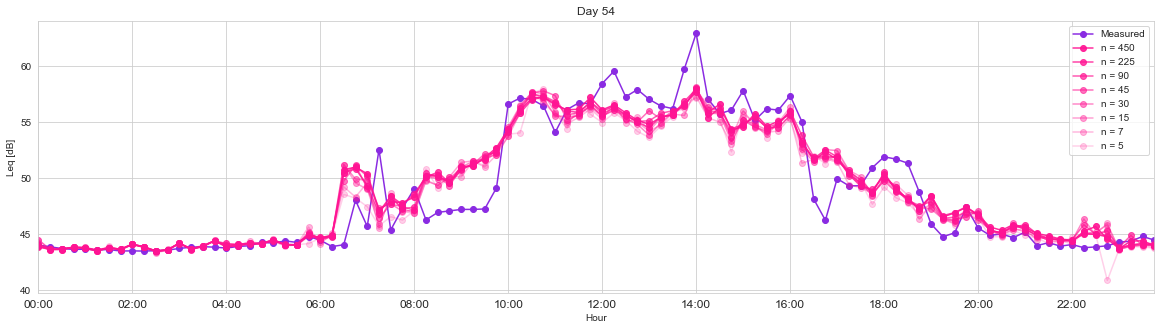

In [6]:
sns.set_style("whitegrid")
sns.set_palette(["deeppink"])

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

plt.plot(test_g["Quarter"] , test_g["Leq"], marker = 'o', label="Measured" , alpha = 1 , color = "blueviolet")

plt.plot(test_g["Quarter"] , y_pred_450, marker = 'o', alpha=0.9 , label = 'n = 450')
plt.plot(test_g["Quarter"] , y_pre_225, marker = 'o', alpha=0.8 , label ='n = 225')
plt.plot(test_g["Quarter"] , y_pred_90, marker = 'o', alpha=0.7 , label = 'n = 90')
plt.plot(test_g["Quarter"] , y_pred_45, marker = 'o', alpha=0.6 , label = 'n = 45')
plt.plot(test_g["Quarter"] , y_pred_30, marker = 'o' , alpha=0.5 , label = 'n = 30')
plt.plot(test_g["Quarter"] , y_pred_15, marker = 'o', alpha=0.4 , label = 'n = 15')
plt.plot(test_g["Quarter"] , y_pred_7, marker = 'o', alpha=0.3 , label = 'n = 7')
plt.plot(test_g["Quarter"] , y_pred_5, marker = 'o', alpha=0.2 , label = 'n = 5')


column_order = [ '0:0', '0:15', '0:30', '0:45',
       '1:0', '1:15', '1:30', '1:45', '2:0', '2:15', '2:30', '2:45',
       '3:0', '3:15', '3:30', '3:45', '4:0', '4:15', '4:30', '4:45',
       '5:0', '5:15', '5:30', '5:45', '6:0', '6:15', '6:30', '6:45',
       '7:0', '7:15', '7:30', '7:45', '8:0', '8:15', '8:30', '8:45',
       '9:0', '9:15', '9:30', '9:45', '10:0', '10:15', '10:30', '10:45',
       '11:0', '11:15', '11:30', '11:45', '12:0', '12:15', '12:30',
       '12:45', '13:0', '13:15', '13:30', '13:45', '14:0', '14:15',
       '14:30', '14:45', '15:0', '15:15', '15:30', '15:45', '16:0', 
       '16:15', '16:30', '16:45', '17:0', '17:15', '17:30',
       '17:45', '18:0', '18:15', '18:30', '18:45', '19:0', '19:15',
       '19:30', '19:45', '20:0', '20:15', '20:30', '20:45', '21:0',
       '21:15', '21:30', '21:45', '22:0', '22:15', '22:30', '22:45',
       '23:0', '23:15', '23:30', '23:45']

hours = ['0:0', '', '', '',
       '', '', '', '', '2:0', '', '', '',
       '', '', '', '', '4:0', '', '', '',
       '', '', '', '', '6:0', '', '', '',
       '', '', '', '', '8:0', '', '', '',
       '', '', '', '', '10:0', '', '', '',
       '', '', '', '', '12:0', '', '',
       '', '', '', '', '', '14:0', '',
       '', '', '', '', '', '', '16:0', 
       '', '', '', '', '', '',
       '', '18:0', '', '', '', '', '',
       '', '', '20:0', '', '', '', '',
       '', '', '', "22:0", '', '', '',
       '', '', '', '' ]

hours2 = ['00:00', '', '', '',
       '', '', '', '', '02:00', '', '', '',
       '', '', '', '', '04:00', '', '', '',
       '', '', '', '', '06:00', '', '', '',
       '', '', '', '', '08:00', '', '', '',
       '', '', '', '', '10:00', '', '', '',
       '', '', '', '', '12:00', '', '',
       '', '', '', '', '', '14:00', '',
       '', '', '', '', '', '', '16:00', 
       '', '', '', '', '', '',
       '', '18:00', '', '', '', '', '',
       '', '', '20:00', '', '', '', '',
       '', '', '', "22:00", '', '', '',
       '', '', '', '' ]

plt.xticks(hours , hours2,  fontsize=12)
plt.margins(x=0)

plt.legend()
plt.xlabel("Hour")
plt.ylabel("Leq [dB]")

plt.title ('Day 54')

In [7]:
reg_results_rmse = pd.DataFrame(RMSE_pred, columns=["Indicator", "RMSE", "n"])
reg_results_rmse450 = pd.DataFrame(RMSE_pred450, columns=["Indicator", "RMSE", "n"])

reg_results_r2 = pd.DataFrame(R2_pred, columns=["Indicator", "R2", "n"])
errors_df = pd.DataFrame(errors, columns = ["Indicator", "Error", "N"])
errors_er_df = pd.DataFrame(errors_r, columns = ["Indicator", "Error", "N"])

errors_er_df;

In [8]:
pd.DataFrame (pr_importance , columns= columns).mean()

weekday       0.118873
hour          0.278760
minute        0.053771
is_holiday    0.123935
is_class      0.424661
dtype: float64

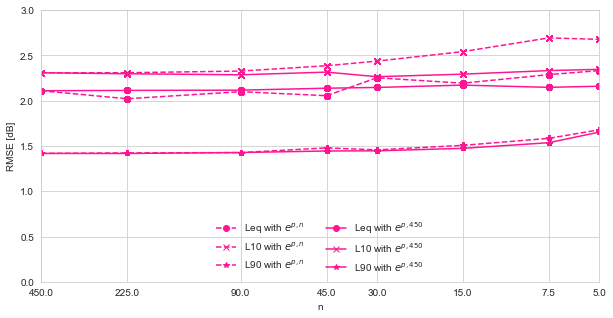

In [9]:
sns.set_style("whitegrid")


fig, ax = plt.subplots()

#plt.rcParams['figure.figsize'] = 16,16

fig.set_size_inches(10, 5)

sns.set_palette(["blueviolet",  "deeppink" , "orangered"])

plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "Leq"], label = "Leq with $e^{p,n}$ ", linestyle='--' , marker = 'o')
plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "L10"], label = "L10 with $e^{p,n}$", linestyle='--' , marker = 'x')
plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "L90"], label = "L90 with $e^{p,n}$", linestyle='--' , marker = '*' )
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "Leq"], label = "Leq with $e^{p,450}$ ",marker = 'o' )
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "L10"], label = "L10 with $e^{p,450}$" , marker = 'x')
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "L90"], label = "L90 with $e^{p,450}$ " ,  marker = '*' )

plt.legend()
plt.xscale('log')
plt.xlabel("n")
plt.ylabel("RMSE [dB]")

ax.set_xticks(errors_er_df["N"].unique())
ax.get_xaxis().set_major_formatter(tk.ScalarFormatter())
ax.set_xlim(450,5)
ax.set_ylim(0,3)
ax.legend(frameon=False, loc='lower center', ncol=2)

## Classification

In [10]:
d1_n = defaultdict(list)
d2_450 = defaultdict(list)

In [11]:
col_y = ["CQI_indicator", "CQI_indicator_4", "CQI_indicator_10", "CQI_indicator_20", "CQI_indicator_30",
"CQI_indicator_60", "CQI_indicator_120", "CQI_indicator_180", "CQI_indicator_300", "CQI_indicator_450", "CQI_indicator_900"]

F1_cl = []
F1_cl450 = []
importance = []

train = data.loc[data["week"] != 8].reset_index() 
test = data.loc[data["week"] == 8].reset_index()

train_X = pd.DataFrame(train, columns=columns)
test_X = pd.DataFrame(test, columns=columns)
test450 = test[col_y[0]]

# for graph purpose 
test_g = test[test.dayofyear == 51]
test_g_x = pd.DataFrame(test_g, columns=columns)

for col in col_y:
    train_y = train[col]
    test_y = test[col]
    
    print (test_y.unique())
    print ("Predictor"  , col)        
    clf = RandomForestClassifier(n_estimators=100, max_features = 5, min_samples_leaf= 1, n_jobs=8)
    clf.fit(train_X, train_y)
    cl_imp = clf.feature_importances_
    y_pred_clf = clf.predict(test_X)
    
        
    if col == "CQI_indicator":
        y_pred_clf_450 = clf.predict(test_g_x)
        
    if col == "CQI_indicator_4":
        y_pred_clf_225 = clf.predict(test_g_x)
    if col == "CQI_indicator_10":
        y_pred_clf_90 = clf.predict(test_g_x)
    if col == "CQI_indicator_20":
        y_pred_clf_45 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_30":
        y_pred_clf_30 = clf.predict(test_g_x)
    if col == "CQI_indicator_60":
        y_pred_clf_15 = clf.predict(test_g_x)
    if col == "CQI_indicator_120":
        y_pred_clf_7 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_180":
        y_pred_clf_5 = clf.predict(test_g_x)
    if col == "CQI_indicator_300":
        y_pred_clf_3 = clf.predict(test_g_x)
    if col == "CQI_indicator_450":
        y_pred_clf_2 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_900":
        y_pred_clf_1 = clf.predict(test_g_x)
    
    
    cm1 = confusion_matrix(test_y, y_pred_clf, labels= ['Excellent', 'Good', 'Fair', 'Poor'])
    cm2 = confusion_matrix(test450, y_pred_clf, labels= ['Excellent', 'Good', 'Fair', 'Poor'])
    f1 = f1_score(y_pred_clf , test_y, average="micro")
    f1_ = f1_score(y_pred_clf , test450, average="micro")
    if len(col.split('_')) == 2:
        f = 2
    else:
        f = col.split('_')[2]
                        
    n = 900/ int(f)
    print ("F1 = " , f1)
    F1_cl.append([ f1, n])
    importance.append(cl_imp)
    d1_n[n].append(cm1)
    d2_450[n].append(cm2)
    F1_cl450.append([f1_, n])

['Good' 'Fair' 'Poor']
Predictor CQI_indicator
F1 =  0.8849028400597907
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_4
F1 =  0.8819133034379671
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_10
F1 =  0.8893871449925261
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_20
F1 =  0.8804185351270553
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_30
F1 =  0.8759342301943199
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_60
F1 =  0.8759342301943199
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_120
F1 =  0.8579970104633782
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_180
F1 =  0.8565022421524664
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_300
F1 =  0.8609865470852018
['Good' 'Fair' 'Poor' 'Excellent']
Predictor CQI_indicator_450
F1 =  0.8251121076233184
['Good' 'Excellent' 'Fair' 'Poor']
Predictor CQI_indicator_900
F1 =  0.804185351270553


In [12]:
test_g['y_pred_clf_450'] = y_pred_clf_450

test_g['y_pred_clf_225'] = y_pred_clf_225
test_g['y_pred_clf_90'] = y_pred_clf_90
test_g['y_pred_clf_45'] = y_pred_clf_45
test_g['y_pred_clf_30'] = y_pred_clf_30

test_g['y_pred_clf_15'] = y_pred_clf_15
test_g['y_pred_clf_7'] = y_pred_clf_7
test_g['y_pred_clf_5'] = y_pred_clf_5
test_g['y_pred_clf_3'] = y_pred_clf_3

test_g['y_pred_clf_2'] = y_pred_clf_2
test_g['y_pred_clf_1'] = y_pred_clf_1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

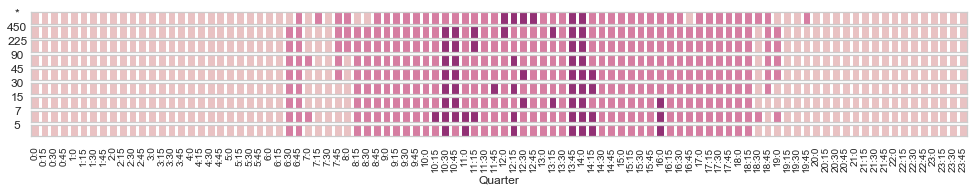

In [13]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(9)
plt.subplots_adjust(top=0.92, bottom=0.06, left=0.10, right=0.75, hspace=0.25, wspace=0.35)
sns.set_palette(["#F0BBBD",  "#E56F9F" , "#A2217C"])

fig.set_size_inches(20, 2);
test_g['placeholder'] = 1


sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_5", data = test_g, dodge=False, ax = ax[8])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_7", data = test_g, dodge=False, ax = ax[7])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_15", data = test_g, dodge=False, ax = ax[6])
sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_30", data = test_g, dodge=False, ax = ax[5])

sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_45", data = test_g, dodge=False, ax = ax[4])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_90", data = test_g, dodge=False, ax = ax[3])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_225", data = test_g, dodge=False, ax = ax[2])
sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_450", data = test_g, dodge=False, ax = ax[1])

sns.barplot(x ="Quarter" , y="placeholder", hue="CQI_indicator", data = test_g, dodge=False, ax = ax[0])

axes = [ax[0] , ax[1] , ax[2] , ax[3] , ax[4] , ax[5] , ax[6] , ax[7] , ax[8]]

for axx in axes: 
    axx.get_yaxis().set_ticklabels([])
    axx.legend().remove()
    axx.margins(x=0)
    axx.margins(y=0)
    if axx != ax[8]:
        axx.get_xaxis().set_visible(False)
        
        
ax[8].set_ylabel('5', rotation=0, fontsize = 12)
ax[7].set_ylabel('7', rotation=0, fontsize =12)
ax[6].set_ylabel('15', rotation=0, fontsize = 12)
ax[5].set_ylabel('30', rotation=0, fontsize = 12)
ax[4].set_ylabel('45', rotation=0, fontsize = 12)
ax[3].set_ylabel('90', rotation=0, fontsize = 12)
ax[2].set_ylabel('225', rotation=0, fontsize = 12)
ax[1].set_ylabel('450', rotation=0, fontsize = 12)
ax[0].set_ylabel('*', rotation = 0 , fontsize = 12)


plt.xticks(rotation=90, fontsize=10)

In [14]:
pd.DataFrame (importance , columns= columns).mean()

weekday       0.171247
hour          0.337771
minute        0.076473
is_holiday    0.131877
is_class      0.282632
dtype: float64

(450, 5)

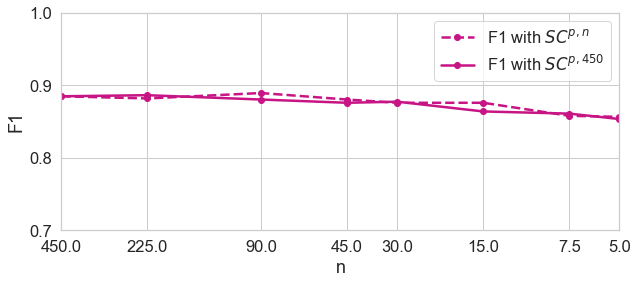

In [15]:
clf_results_f1 = pd.DataFrame(F1_cl, columns=["F1", "n"])
clf_results450_f1 = pd.DataFrame(F1_cl450, columns=["F1", "n"])


sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
sns.set_palette(["mediumvioletred"])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(10, 4)

plt.plot("n", "F1", data=clf_results_f1,  linewidth=2.5, marker = 'o', label = "F1 with $SC^{p,n}$",  linestyle='--')
plt.plot("n", "F1", data=clf_results450_f1,  linewidth=2.5, marker = 'o', label = "F1 with $SC^{p,450}$")


plt.xscale('log')
plt.xlabel("n")
plt.ylabel("F1")
plt.legend()
ax.set_xticks(errors_er_df["N"].unique())
ax.get_xaxis().set_major_formatter(tk.ScalarFormatter())
plt.ylim(0.7,1)
plt.xlim((450,5))